In [1]:
import nltk
from nltk.corpus import twitter_samples
from package import process_tweets, build_freqs
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
import socket
socket.getaddrinfo('localhost', 8080)

[(<AddressFamily.AF_INET6: 23>, 0, 0, '', ('::1', 8080, 0, 0)),
 (<AddressFamily.AF_INET: 2>, 0, 0, '', ('127.0.0.1', 8080))]

In [3]:
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

In [4]:
tweets = all_positive_tweets + all_negative_tweets

In [5]:
labels = np.append(np.ones((len(all_positive_tweets))), np.zeros((len(all_negative_tweets))))

In [6]:
freqs = build_freqs(tweets, labels)

In [7]:
keys = ['happi', 'merri', 'nice', 'good', 'bad', 'sad', 'mad', 'best', 'pretti', '❤', ':)', ':(', '😒', '😬', '😄', '😍', '♛', 'song', 'idea', 'power', 'play', 'magnific']

In [8]:
data = []

for word in keys:
    pos=0
    neg=0
    if(word,1) in freqs:
        pos = freqs[(word,1)]
    if(word,0) in freqs:
        neg = freqs[(word,0)]
    data.append([word,pos,neg])

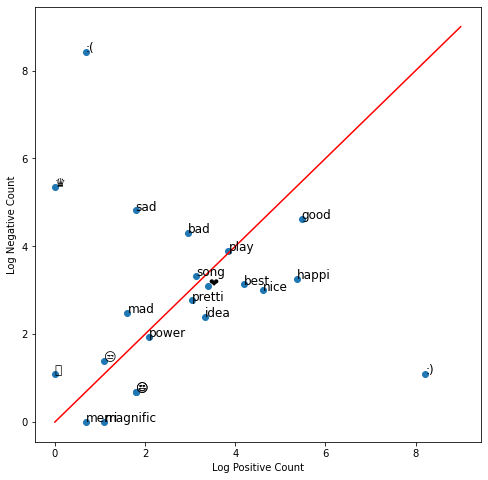

In [9]:
fig, ax = plt.subplots(figsize=(8,8))

x = np.log([x[1]+1 for x in data])
y = np.log([x[2]+1 for x in data])
ax.scatter(x,y)

plt.xlabel("Log Positive Count")
plt.ylabel("Log Negative Count")

for i in range(0, len(data)):
    ax.annotate(data[i][0],(x[i], y[i]), fontsize=12)
ax.plot([0,9],[0,9], color='red')
plt.show()